In [60]:
# basics
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# ML Algorithms and others
from sklearn import metrics
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

# data splitting
from sklearn.model_selection import train_test_split

# hyperparameter handling
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from matplotlib.legend_handler import HandlerLine2D


In [61]:
df=pd.read_csv("./data/mm.data") #load train data
df.columns = ['BI-RADS', 'Age','Shape','Margin','Density','Severity']
df.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 6 columns):
BI-RADS     960 non-null object
Age         960 non-null object
Shape       960 non-null object
Margin      960 non-null object
Density     960 non-null object
Severity    960 non-null int64
dtypes: int64(1), object(5)
memory usage: 45.1+ KB


In [63]:
df.describe()

,Severity
count,960.000000
mean,0.462500
std,0.498852
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [64]:
dt=df.replace('?', np.nan)
dt.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,4,43,1,1,NaN,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,NaN,1
4,4,65,1,NaN,3,0


In [65]:
total = dt.isnull().sum().sort_values(ascending=False)
percent1 = dt.isnull().sum()/dt.isnull().count()*100
percent2 = (round(percent1, 1)).sort_values(ascending=False)
missingData = pd.concat([total, percent2], axis=1, keys=['Total', '%'])
missingData.head()

,Total,%
Density,76,7.9
Margin,48,5.0
Shape,31,3.2
Age,5,0.5
BI-RADS,2,0.2


In [66]:
dt['Density'] = dt['Density'].replace(np.nan, 100)
dt['Density']=dt['Density'].astype(int)

dt['Margin'] = dt['Margin'].replace(np.nan, 100)
dt['Margin']=dt['Margin'].astype(int)

dt['Shape'] = dt['Shape'].replace(np.nan, 100)
dt['Shape']=dt['Shape'].astype(int)


dt['Age'] = dt['Age'].replace(np.nan, 100)
dt['Age']=dt['Age'].astype(int)


dt['BI-RADS'] = dt['BI-RADS'].replace(np.nan, 0)
dt['BI-RADS']=dt['BI-RADS'].astype(int)


dt.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,4,43,1,1,100,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,100,1
4,4,65,1,100,3,0


In [67]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 6 columns):
BI-RADS     960 non-null int64
Age         960 non-null int64
Shape       960 non-null int64
Margin      960 non-null int64
Density     960 non-null int64
Severity    960 non-null int64
dtypes: int64(6)
memory usage: 45.1 KB


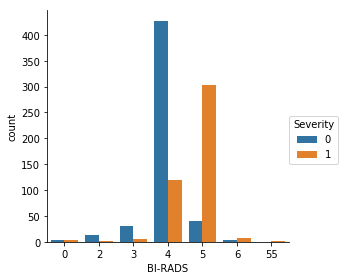

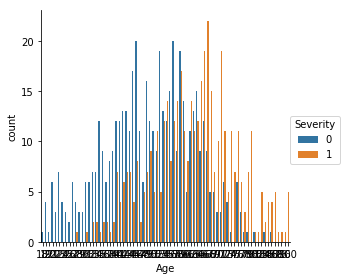

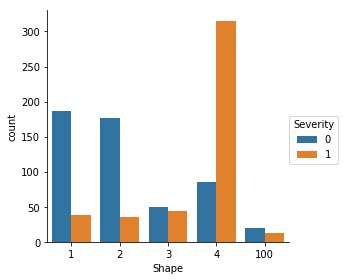

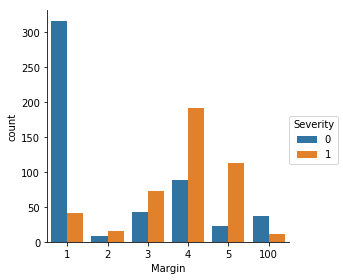

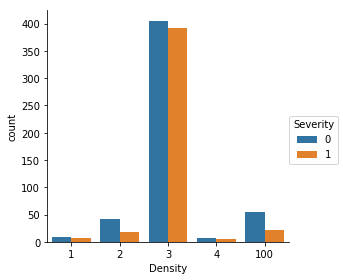

In [68]:
df_plot=dt
sns.factorplot('BI-RADS', data = df_plot, kind = 'count', hue='Severity')
sns.factorplot('Age', data = df_plot, kind = 'count', hue='Severity')
sns.factorplot('Shape', data = df_plot, kind = 'count', hue='Severity')
sns.factorplot('Margin', data = df_plot, kind = 'count', hue='Severity')
sns.factorplot('Density', data = df_plot, kind = 'count', hue='Severity')


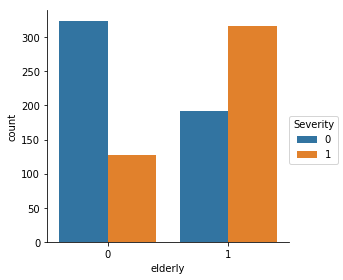

In [69]:
dt['elderly'] = np.where(dt['Age']<=55, 0,1)
sns.factorplot('elderly', data = df_plot, kind = 'count', hue='Severity')

In [70]:
#dt.groupby('elderly').count()
print(min(dt['Age']))
print(max(dt['Age']))

18
100


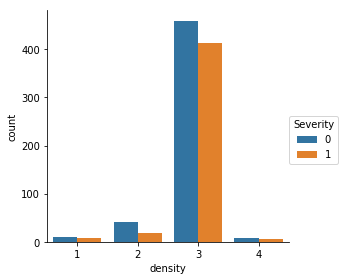

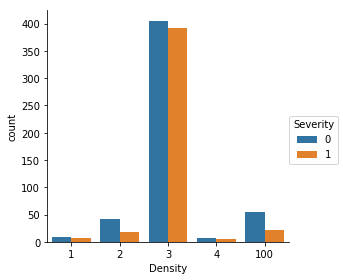

In [71]:
dt['density'] = np.where(dt['Density']==100, 3,dt['Density'])
sns.factorplot('density', data = dt, kind = 'count', hue='Severity')
sns.factorplot('Density', data = dt, kind = 'count', hue='Severity')

#del dt['Density']

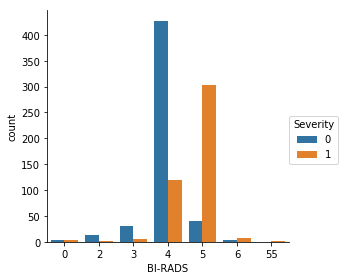

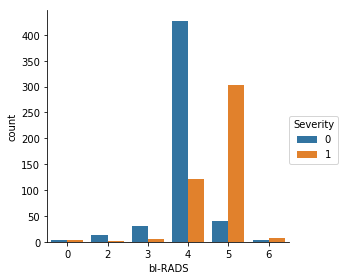

In [72]:
dt['bI-RADS'] = np.where(dt['BI-RADS']==100 ,np.random.randint(low=1, high=6),dt['BI-RADS'])
dt['bI-RADS'] = np.where(dt['BI-RADS']==55 ,np.random.randint(low=1, high=6),dt['BI-RADS'])
sns.factorplot('BI-RADS', data = dt, kind = 'count', hue='Severity')
sns.factorplot('bI-RADS', data = dt, kind = 'count', hue='Severity')    

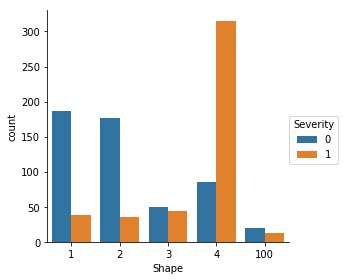

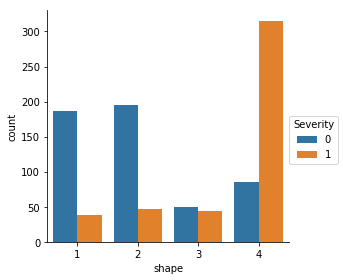

In [73]:
dt['shape'] = np.where(dt['Shape']==100,np.random.randint(low=0, high=5),dt['Shape'])
sns.factorplot('Shape', data = dt, kind = 'count', hue='Severity')
sns.factorplot('shape', data = dt, kind = 'count', hue='Severity')    

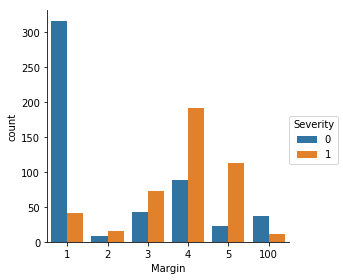

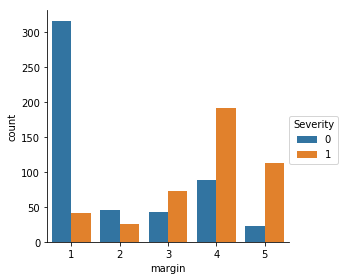

In [74]:
dt['margin'] = np.where(dt['Margin']==100,np.random.randint(low=0, high=6),dt['Margin'])
sns.factorplot('Margin', data = dt, kind = 'count', hue='Severity')
sns.factorplot('margin', data = dt, kind = 'count', hue='Severity')    

In [75]:
del dt['Density'] 
del dt['Margin']
del dt['Shape'] 
del dt['Age'] 
del dt['BI-RADS'] 
dt.head()

,Severity,elderly,density,bI-RADS,shape,margin
0,1,0,3,4,1,1
1,1,1,3,5,4,5
2,0,0,3,4,1,1
3,1,1,3,5,1,5
4,0,1,3,4,1,2


In [76]:
train,test = train_test_split(dt, train_size=0.7,test_size=0.3, random_state=42)

In [77]:
feature_col_names=['elderly','density','bI-RADS','shape','margin']
predicted_class_name=['Severity']
X_train= train[feature_col_names].values #predictor feature columns (10 x m)
y_train=train[predicted_class_name].values #predicted class (1 = true, 0 = false) column (1 x m)
X_test=test[feature_col_names].values #predictor feature columns (10 x m)
y_test=test[predicted_class_name].values #predicted class (1 = true, 0 = false) column (1 x m)

In [78]:
rf = RandomForestClassifier(random_state = 42)
print('Hyperparameters currently in use:\n')
pprint(rf.get_params())

Hyperparameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


## Hyperparameter Evaluation

### n_estimators

/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-pa

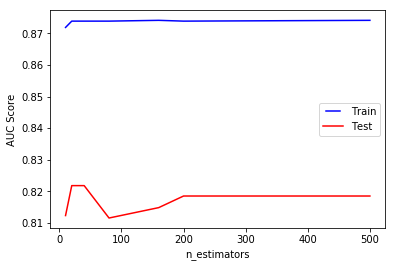

In [79]:
n_estimators = [10, 20, 40, 80, 160,200,500]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train,train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(n_estimators, train_results, 'b', label='Train')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC Score')
plt.xlabel('n_estimators')
plt.show()

/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-pa

/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-pa

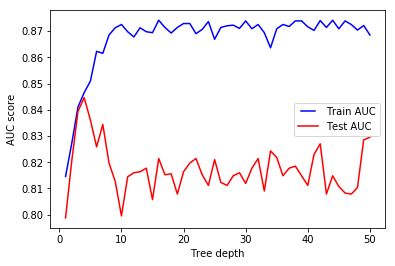

In [80]:
max_depths = np.linspace(1, 50, 50, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_aucA = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_aucA)
    y_pred = rf.predict(X_test)
    false_positive_rateA, true_positive_rateA, thresholds = roc_curve(y_test, y_pred)
    roc_aucB = auc(false_positive_rateA, true_positive_rateA)
    test_results.append(roc_aucB)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-pa

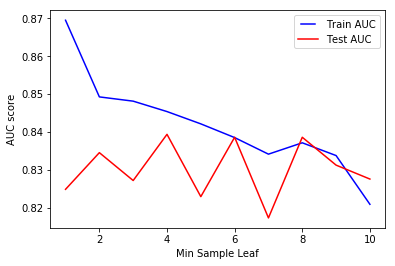

In [81]:
min_samples_leaf = [1,2,3,4,5,6,7,8,9,10]
train_results = []
test_results = []
for min_samples_l in min_samples_leaf:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_l, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_aucA = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_aucA)
    y_pred = rf.predict(X_test)
    false_positive_rateA, true_positive_rateA, thresholds = roc_curve(y_test, y_pred)
    roc_aucB = auc(false_positive_rateA, true_positive_rateA)
    test_results.append(roc_aucB)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leaf, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leaf, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Min Sample Leaf')
plt.show()

/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


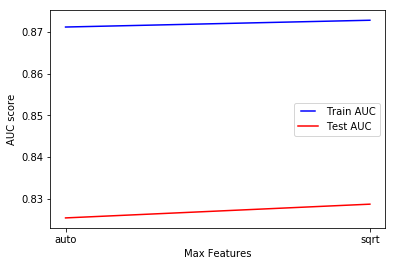

In [82]:
max_features = ['auto', 'sqrt']
train_results = []
test_results = []
for max_feature in max_features:
    rf = RandomForestClassifier(max_features=max_feature, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_aucA = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_aucA)
    y_pred = rf.predict(X_test)
    false_positive_rateA, true_positive_rateA, thresholds = roc_curve(y_test, y_pred)
    roc_aucB = auc(false_positive_rateA, true_positive_rateA)
    test_results.append(roc_aucB)

line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Max Features')
plt.show()

/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-pa

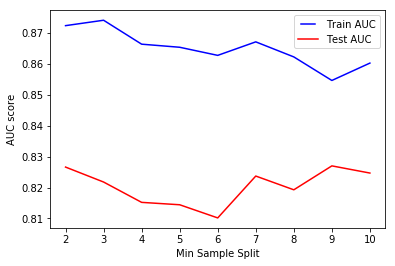

In [83]:
min_samples_split = [2,3,4,5,6,7,8,9,10]
train_results = []
test_results = []
for mss in min_samples_split:
    rf = RandomForestClassifier(min_samples_split=mss, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_aucA = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_aucA)
    y_pred = rf.predict(X_test)
    false_positive_rateA, true_positive_rateA, thresholds = roc_curve(y_test, y_pred)
    roc_aucB = auc(false_positive_rateA, true_positive_rateA)
    test_results.append(roc_aucB)

line1, = plt.plot(min_samples_split, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_split, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Min Sample Split')
plt.show()

/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


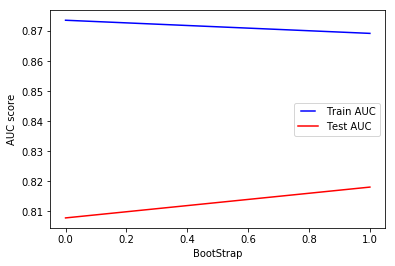

In [84]:
bootstrap = [True, False]
train_results = []
test_results = []
for bt in bootstrap:
    rf = RandomForestClassifier(bootstrap=bt, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_aucA = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_aucA)
    y_pred = rf.predict(X_test)
    false_positive_rateA, true_positive_rateA, thresholds = roc_curve(y_test, y_pred)
    roc_aucB = auc(false_positive_rateA, true_positive_rateA)
    test_results.append(roc_aucB)

line1, = plt.plot(bootstrap, train_results, 'b', label='Train AUC')
line2, = plt.plot(bootstrap, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('BootStrap')
plt.show()

In [92]:
rf_model = RandomForestClassifier()      # Create random forest object
rf_model.fit(X_train, y_train.ravel())

rf_predict_train = rf_model.predict(X_train)
rf_predict_test = rf_model.predict(X_test)

print('Model Performance')

# training metrics
default_accuracy=metrics.accuracy_score(y_test, rf_predict_test)
print("Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print("Test data Accuracy: {0:.4f}".format(default_accuracy))

Model Performance
Train data Accuracy: 0.8259
Test data Accuracy: 0.7986


## Randomized SearchCV

In [86]:
# Number of trees in random forest -OK
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 210, num = 9)]
# Number of features to consider at every split -OK
max_features = [ 'sqrt'] 
# Maximum number of levels in tree - OK
max_depth = [int(x) for x in np.linspace(10, 40, num = 5)]
# Minimum number of samples required to split a node -OK
min_samples_split = [7,8,9]
# Minimum number of samples required at each leaf node -OK
min_samples_leaf = [2,3,4,5,6,7,8]
# Method of selecting samples for training each tree - OK
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#pprint(random_grid)

In [87]:
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=random_grid,
                               scoring='neg_mean_absolute_error', 
                              cv = 5, verbose=2,  n_jobs=-1,
                              return_train_score=True)
# Fit the random search model
rf_random.fit(X_train, y_train.ravel());

rf_random_train = rf_random.predict(X_train)
rf_random_test = rf_random.predict(X_test)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=205, min_samples_split=9, min_samples_leaf=5, max_features=sqrt, max_depth=10, bootstrap=True 
[CV] n_estimators=205, min_samples_split=9, min_samples_leaf=5, max_features=sqrt, max_depth=10, bootstrap=True 
[CV] n_estimators=205, min_samples_split=9, min_samples_leaf=5, max_features=sqrt, max_depth=10, bootstrap=True 
[CV] n_estimators=205, min_samples_split=9, min_samples_leaf=5, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=205, min_samples_split=9, min_samples_leaf=5, max_features=sqrt, max_depth=10, bootstrap=True, total=   0.4s
[CV] n_estimators=205, min_samples_split=9, min_samples_leaf=5, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=205, min_samples_split=9, min_samples_leaf=5, max_features=sqrt, max_depth=10, bootstrap=True, total=   0.4s
[CV]  n_estimators=205, min_samples_split=9, min_samples_leaf=5, max_features=sqrt, max_depth=10, bootstrap=True, tota

[CV]  n_estimators=210, min_samples_split=8, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True, total=   0.4s
[CV] n_estimators=208, min_samples_split=9, min_samples_leaf=8, max_features=sqrt, max_depth=40, bootstrap=True 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.1s


[CV]  n_estimators=210, min_samples_split=8, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True, total=   0.5s
[CV] n_estimators=208, min_samples_split=9, min_samples_leaf=8, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=210, min_samples_split=8, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True, total=   0.5s
[CV] n_estimators=208, min_samples_split=9, min_samples_leaf=8, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=208, min_samples_split=9, min_samples_leaf=8, max_features=sqrt, max_depth=40, bootstrap=True, total=   0.5s
[CV] n_estimators=208, min_samples_split=9, min_samples_leaf=8, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=208, min_samples_split=9, min_samples_leaf=8, max_features=sqrt, max_depth=40, bootstrap=True, total=   0.5s
[CV] n_estimators=201, min_samples_split=7, min_samples_leaf=4, max_features=sqrt, max_depth=32, bootstrap=True 
[CV]  n_estimators=208, min_samples_

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.1s finished


In [88]:
rf_random.best_params_

{'n_estimators': 203,
 'min_samples_split': 9,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': True}

In [89]:
random_accuracy=metrics.accuracy_score(y_test, rf_random_test)
print("Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_random_train)))
print("Test data Accuracy: {0:.4f}".format(random_accuracy))

Train data Accuracy: 0.8497
Test data Accuracy: 0.8368


In [93]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - default_accuracy) ))

Improvement of 3.82%.


### Grid SearchCV

In [32]:
# Number of trees in random forest -OK
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 210, num = 9)]
# Number of features to consider at every split -OK
max_features = [ 'sqrt'] 
# Maximum number of levels in tree - OK
max_depth = [int(x) for x in np.linspace(10, 40, num = 5)]
# Minimum number of samples required to split a node -OK
min_samples_split = [7,8,9]
# Minimum number of samples required at each leaf node -OK
min_samples_leaf = [2,3,4,5,6,7,8]
# Method of selecting samples for training each tree - OK
bootstrap = [True]

# Create the  grid
p_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)




{'bootstrap': [True],
 'max_depth': [10, 17, 25, 32, 40],
 'max_features': ['sqrt'],
 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8],
 'min_samples_split': [7, 8, 9],
 'n_estimators': [200, 201, 202, 203, 205, 206, 207, 208, 210]}


In [33]:
rf_grid = GridSearchCV(estimator=rf_model,param_grid=p_grid,
                               scoring='neg_mean_absolute_error', 
                              cv = 5, verbose=2,  n_jobs=-1,
                              return_train_score=True)

rf_grid .fit(X_train, y_train.ravel());

rf_grid_train = rf_grid .predict(X_train)
rf_grid_test = rf_grid .predict(X_test)


Fitting 5 folds for each of 945 candidates, totalling 4725 fits
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=200 
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=200 
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=200 
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=201 
[C

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=207, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=207, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.0s


[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=207, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=210 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=210 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=205, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=206 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=205, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=206 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=206, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=206 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=206, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=207 
[CV]  bootstrap=True, max_depth=10, 

KeyboardInterrupt: 

In [34]:
random_accuracy=metrics.accuracy_score(y_test, rf_random_test)
print("Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_random_train)))
print("Test data Accuracy: {0:.4f}".format(random_accuracy))

Train data Accuracy: 0.8601
Test data Accuracy: 0.8299


In [53]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - default_accuracy) ))

Improvement of 3.47%.
